#-----------openbabel------------
Tool #1 - openbabel: can read all file types EXCEPT for AA sequence or fasta for proteins
Purpose: Convert the molecular format type (i.e., fasta, smiles, sdf) into different molecular format type
https://openbabel.org/docs/dev/UseTheLibrary/PythonDoc.html
https://github.com/openbabel/openbabel/blob/master/scripts/python/Examples.html

#-----------rdkit------------
Tool #2 - rdkit   (NOTE: only works on python mypy36env)
Purpose: Convert the molecular format type (i.e., fasta, smiles, sdf) into different molecular format type

In [ ]:
#import packages
import getopt
from io import StringIO 
import matplotlib.pyplot as plt
import numpy as np
import openbabel
import os
import pandas as pd
import pprint
import pybel
import re
import rdkit
from rdkit import Chem, rdBase, RDConfig  #only works on python mypy36env
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw, AllChem, PandasTools
from rdkit.Chem.rdmolfiles import SmilesWriter, SDWriter
import subprocess
import seaborn as sns
import sys
import traceback
import xlrd
print(rdBase.rdkitVersion)

# Import defined functions
import convert_aa_seq_to_smiles, convert_smiles_to_sdf

In [ ]:
# Variables
mol = openbabel.OBMol()
IPythonConsole.ipython_useSVG=True  #< set this to False if you want PNGs instead of SVGs%matplotlib inline

In [19]:
# Import data 
Synergy_peptides_DBAASP = pd.read_csv('/Users/Lauren/Vegify Dropbox/Lauren Urban/Synergy AMPs project/data/Synergy_peptides_DBAASP.csv')
Synergy_peptides_DBAASP

# Import control peptides
cntrl_pep = pd.read_csv('/Users/Lauren/Vegify Dropbox/Lauren Urban/Synergy AMPs project/data/Random proteins sequence RandSeq.csv')
cntrl_pep

/Users/lauren/opt/anaconda3/envs/mypy36env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (14,15,17,18,54,56,57,58,59,60,63,64,65,66,67,68,77) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ID,SEQUENCE
0,>RND29816 Randomly generated sequence,AFEMIDRAVSNYLKTGHLPQ
1,>RND32281 Randomly generated sequence,QMRAEKLANLHIVDGPYFST
2,>RND32537 Randomly generated sequence,LSTHPRDKLIANMQFAEYVG
3,>RND32770 Randomly generated sequence,AVFRELNTLIPGSDAKYQMH
4,>RND33021 Randomly generated sequence,AIHKVTSDPLYRFLANMGQE
5,>RND34210 Randomly generated sequence,STIRFKPYEQLGAMVNLHDA
6,>RND34727 Randomly generated sequence,SKGMNVYTPDIFQRLLEAAH
7,>RND34938 Randomly generated sequence,KGALEDIVTMRYAFQPLSNH
8,>RND35187 Randomly generated sequence,GAQEAMRSLDKNHVPYFTIL
9,>RND35419 Randomly generated sequence,LYASNVRDLTEKFHPAMGIQ


In [10]:
# remove unnecessary columns
keep_cols = ['ID', 'NAME', 'SEQUENCE', 'TARGET GROUP', 'TARGET OBJECT', 'TARGET ACTIVITY - TARGET SPECIES', 'SYNERGY - TARGET SPECIE', 'SYNERGY - ANTIBIOTIC NAME', 'Edited SYNERGY - FICI']
#df = Synergy_peptides_DBAASP.iloc[:, [0,2,4,7,8,33,58,63, 69]] # make dataframe with 1st 6 colms, all rows and set input as strings data type
df = Synergy_peptides_DBAASP[keep_cols].copy()
print(df.dtypes)

ID                                    int64
NAME                                 object
SEQUENCE                             object
TARGET GROUP                         object
TARGET OBJECT                        object
TARGET ACTIVITY - TARGET SPECIES     object
SYNERGY - TARGET SPECIE              object
SYNERGY - ANTIBIOTIC NAME            object
Edited SYNERGY - FICI               float64
dtype: object


In [13]:
# Convert the AA sequence (listed in column SEQUENCE) into smiles. If error return "error" and add results as new column in dataset "data"
df = convert_aa_seq_to_smiles(df, "SEQUENCE")
df

,ID,NAME,SEQUENCE,TARGET GROUP,TARGET OBJECT,TARGET ACTIVITY - TARGET SPECIES,SYNERGY - TARGET SPECIE,SYNERGY - ANTIBIOTIC NAME,Edited SYNERGY - FICI,smiles
0,806,Melittin,GIGAVLKVLTTGLPALISWIKRKRQQ,"Gram+,Gram-,Parasite,Cancer,Fungus,Mammalian C...",Lipid Bilayer,Staphylococcus aureus 8530,Pseudomonas aeruginosa 1,Doripenem,0.01,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
1,806,Melittin,GIGAVLKVLTTGLPALISWIKRKRQQ,"Gram+,Gram-,Parasite,Cancer,Fungus,Mammalian C...",Lipid Bilayer,Pseudomonas putida NCIM 2102,Pseudomonas aeruginosa 2,Doripenem,0.01,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
2,7680,"DP7, HH2 [L3W,A12K]",VQWRIRVAVIRK,"Gram+,Gram-,Mammalian Cell",Lipid Bilayer,Staphylococcus aureus SAU2,Staphylococcus aureus SAU2,Azithromycin,0.01,CC[C@H](C)[C@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[...
3,10099,LfcinB (21–25)Pal,RWQWRWQWR,"Gram+,Gram-,Mammalian Cell",Lipid Bilayer,Stenotrophomonas maltophilia ATCC 13636,Staphylococcus aureus ATCC 25923,Vancomycin,0.01,N=C(N)NCCC[C@H](N)C(=O)N[C@@H](Cc1c[nH]c2ccccc...
4,806,Melittin,GIGAVLKVLTTGLPALISWIKRKRQQ,"Gram+,Gram-,Parasite,Cancer,Fungus,Mammalian C...",Lipid Bilayer,Bacillus subtilis,Pseudomonas aeruginosa 1,Ceftazidime,0.02,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...
...,...,...,...,...,...,...,...,...,...,...
9845,19119,CaD23,KRIVQRIKDWLRKLCKKW,"Gram+,Gram-,Mammalian Cell",Lipid Bilayer,Pseudomonas aeruginosa PAO1,NaN,NaN,NaN,CC[C@H](C)[C@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[...
9846,19119,CaD23,KRIVQRIKDWLRKLCKKW,"Gram+,Gram-,Mammalian Cell",Lipid Bilayer,Pseudomonas aeruginosa,NaN,NaN,NaN,CC[C@H](C)[C@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[...
9847,19119,CaD23,KRIVQRIKDWLRKLCKKW,"Gram+,Gram-,Mammalian Cell",Lipid Bilayer,Pseudomonas aeruginosa,NaN,NaN,NaN,CC[C@H](C)[C@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[...
9848,19119,CaD23,KRIVQRIKDWLRKLCKKW,"Gram+,Gram-,Mammalian Cell",Lipid Bilayer,Pseudomonas aeruginosa ATCC 19660,NaN,NaN,NaN,CC[C@H](C)[C@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[...


In [16]:
# Save SMILES as csv file
df.to_csv('/Users/Lauren/Vegify Dropbox/Lauren Urban/Synergy AMPs project/data/SDF, smi files/Synergy_peptides_DBAASP_smiles.csv',  index=False)

In [47]:
# Drop rows in data if smiles = "error"
df_clean = df[df["smiles"] != "error"] 
df_clean['ID'].isnull().values.any()

False

,ID,NAME,SEQUENCE,smiles,SDF
0,37,PGLa,GMASKAGAIAGKIAKVALKAL,CC[C@H](C)[C@H](NC(=O)[C@H](C)NC(=O)CNC(=O)[C@...,
39,144,LL-37 (17-29),FKRIVQRIKDFLR,CC[C@H](C)[C@H](NC(=O)[C@H](CCCNC(=N)N)NC(=O)[...,
59,160,Tritrpticin,VRRFPWWWPFLRR,CC(C)C[C@H](NC(=O)[C@H](Cc1ccccc1)NC(=O)[C@@H]...,
87,165,"CP26, MBI 26",KWKSFIKKLTSAAKKVVTTAKPLISS,CC[C@H](C)[C@H](NC(=O)[C@H](CC(C)C)NC(=O)[C@@H...,
133,360,Magainin-2 \t,GIGKFLHSAKKFGKAFVGEIMNS,CC[C@H](C)[C@H](NC(=O)CN)C(=O)NCC(=O)N[C@@H](C...,
...,...,...,...,...,...
9671,18887,"Cyclo(Trp-Arg), Diketopiperazine (WR)",WR,N=C(N)NCCC[C@H](NC(=O)[C@@H](N)Cc1c[nH]c2ccccc...,
9691,18888,"Cyclo(D-Trp-D-Arg), Diketopiperazine (wr)",wr,N=C(N)NCCC[C@H](NC(=O)[C@@H](N)Cc1c[nH]c2ccccc...,
9790,19007,"Actinomycesin AMSIN, Defensin-like Bacteriocin",GFGCPWNAYECDRHCVSKGYTGGNCRGKIRQTCHCY,CC[C@H](C)[C@H](NC(=O)[C@H](CCCCN)NC(=O)CNC(=O...,
9819,19017,"Heteroscorpine-1 (1-38)[E5,6Del;D13Del;N19K;G2...",GWINKIQKKIEKIGNKILGGMAKAGPVVHKLAKGEFQ,CC[C@H](C)[C@H](NC(=O)[C@H](CCCCN)NC(=O)[C@H](...,

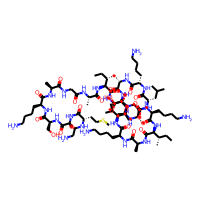
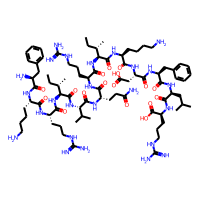
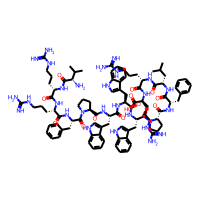
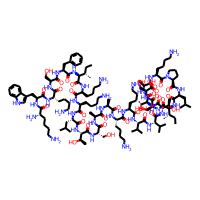
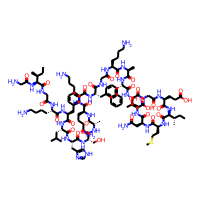
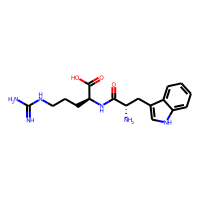
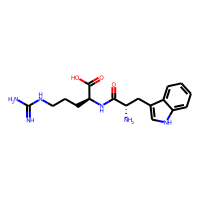
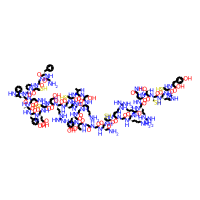
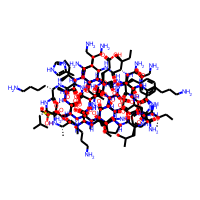
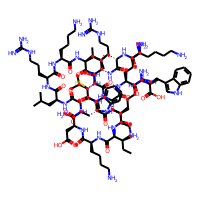

In [53]:
# Adds a column that contains the sdf file info
# Reference: https://www.rdkit.org/docs/source/rdkit.Chem.PandasTools.html
df_sdf = convert_smiles_to_sdf(df_clean, "Synergy_DBAASP.sdf")
df_sdf